In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


import warnings

warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
df = pd.read_csv('Student_Performance.csv')
df.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


In [3]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [4]:
# encoding categorical data
df['Extracurricular Activities'].replace({'Yes':1, 'No':0}, inplace=True)

In [6]:
# mean values
df.groupby("Performance Index").mean()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
Performance Index,,,,,
10.0,1.000000,40.000000,0.000000,5.000000,9.000000
11.0,1.200000,40.400000,0.400000,6.000000,3.200000
12.0,1.000000,40.875000,0.125000,6.125000,4.125000
13.0,1.384615,40.769231,0.384615,5.230769,4.384615
14.0,1.000000,40.857143,0.142857,6.142857,4.428571
...,...,...,...,...,...
96.0,8.571429,98.357143,0.428571,6.714286,6.285714
97.0,8.615385,98.000000,0.461538,6.538462,5.923077
98.0,8.857143,98.285714,0.857143,7.857143,4.000000


In [17]:
# distribution of data
df["Extracurricular Activities"].value_counts()

0    5052
1    4948
Name: Extracurricular Activities, dtype: int64

<Axes: xlabel='Performance Index', ylabel='Density'>

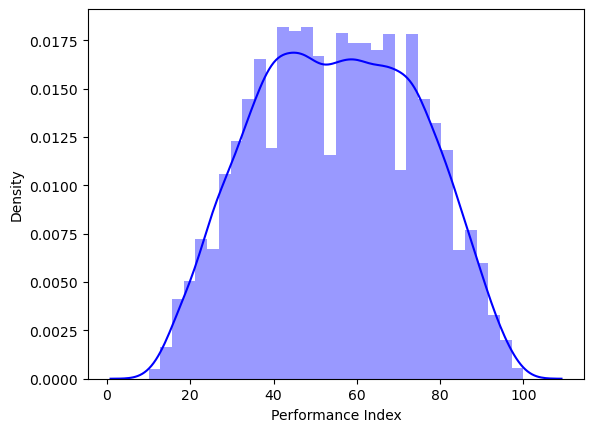

In [7]:
# distribution of Performance 
sns.distplot(df["Performance Index"], color = "blue")

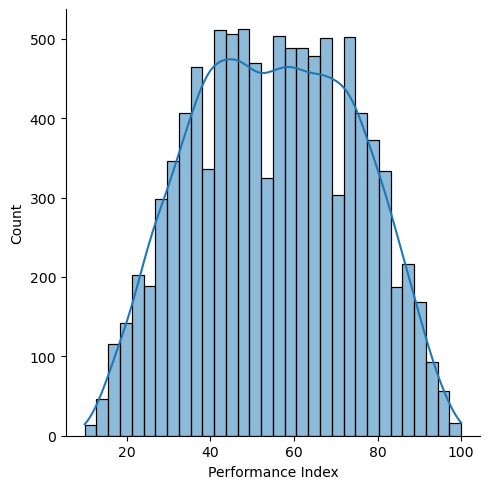

In [30]:
# distribution of Performance 
sns.displot(df["Performance Index"], kde=True)

# Model training using Random Forest Regressor

In [35]:
regressor = RandomForestRegressor()


In [36]:
# training the model
regressor.fit(X_train, Y_train)
RandomForestRegressor()

RandomForestRegressor()

In [37]:
# prediciton on train data
train_data_prediciton = regressor.predict(X_train)
# R squared error
train_error_score = metrics.r2_score(train_data_prediciton, Y_train)
print("R squared error: ", train_error_score)


# prediciton on test data
test_data_prediciton = regressor.predict(X_test)
# R squared error
test_error_score = metrics.r2_score(test_data_prediciton, Y_test)
print("R squared error: ", test_error_score)

R squared error:  0.6008689534055783
R squared error:  -6.531751473530499


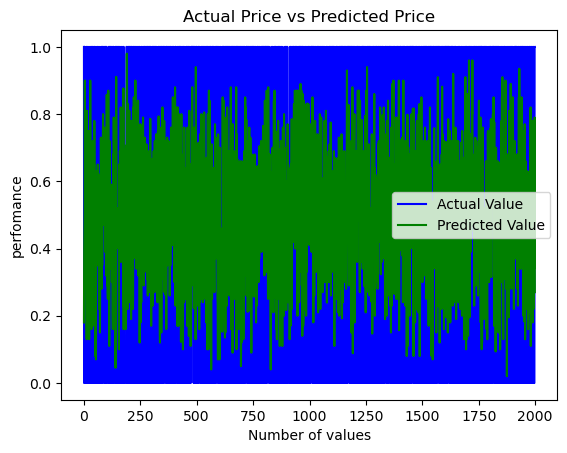

In [39]:
Y_test = list(Y_test)
plt.plot(Y_test, color = "blue", label = "Actual Value")
plt.plot(test_data_prediciton, color = "green", label = "Predicted Value")
plt.title("Actual Price vs Predicted Price")
plt.xlabel("Number of values")
plt.ylabel("perfomance")
plt.legend()
plt.show()

# Logistic Regression model

In [25]:
# separate data and label
X = df.drop("Performance Index", axis = 1)
# label binarization or label encoding
Y = df["Performance Index"].apply(lambda y_value: 1 if y_value >= 80.0 else 0)
print(X)
print(Y)

      Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0                 7               99                           1            9   
1                 4               82                           0            4   
2                 8               51                           1            7   
3                 5               52                           1            5   
4                 7               75                           0            8   
...             ...              ...                         ...          ...   
9995              1               49                           1            4   
9996              7               64                           1            8   
9997              6               83                           1            8   
9998              9               97                           1            7   
9999              7               74                           0            8   

      Sample Question Paper

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)
print(standardized_data)

[[ 0.77518771  1.70417565  1.01045465  1.45620461 -1.24975394]
 [-0.38348058  0.72391268 -0.98965352 -1.49229423 -0.90098215]
 [ 1.16141048 -1.06362569  1.01045465  0.27680507 -0.90098215]
 ...
 [ 0.38896495  0.7815752   1.01045465  0.86650484  0.1453332 ]
 [ 1.54763324  1.5888506   1.01045465  0.27680507 -1.59852572]
 [ 0.77518771  0.26261245 -0.98965352  0.86650484 -1.24975394]]


In [27]:
# updating features with standardized data
X = standardized_data
print(X)

[[ 0.77518771  1.70417565  1.01045465  1.45620461 -1.24975394]
 [-0.38348058  0.72391268 -0.98965352 -1.49229423 -0.90098215]
 [ 1.16141048 -1.06362569  1.01045465  0.27680507 -0.90098215]
 ...
 [ 0.38896495  0.7815752   1.01045465  0.86650484  0.1453332 ]
 [ 1.54763324  1.5888506   1.01045465  0.27680507 -1.59852572]
 [ 0.77518771  0.26261245 -0.98965352  0.86650484 -1.24975394]]


In [28]:
print(Y)

0       1
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: Performance Index, Length: 10000, dtype: int64


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)
print("Total data: ", X.shape)
print("Train data: ", X_train.shape)
print("Test data: ", X_test.shape)

Total data:  (10000, 5)
Train data:  (8000, 5)
Test data:  (2000, 5)


In [30]:
model = LogisticRegression()
#training the Logistic Regression model
model.fit(X_train, Y_train)

LogisticRegression()

In [31]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Accuracy on training data: ", training_data_accuracy)


# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy on training data: ", test_data_accuracy)

Accuracy on training data:  0.982125
Accuracy on training data:  0.9785


In [38]:
input_data = (80.0,89.0,76.0,36.0,31.0)

# changing input data to a numpy array
input_data_as_numpy_arr = np.asarray(input_data)

# reshape the numpy array as we're predicting for one instance
input_data_reshaped = input_data_as_numpy_arr.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == '0'):
    print("a good perfomance")
else:
    print("could be better")

[1]
could be better


# Model training using SVM

In [16]:
classifier = svm.SVC(kernel='linear')
# training SVM classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [17]:
# accuracy on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Accuracy on training data: ", training_data_accuracy)


# accuracy on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy on test data: ", test_data_accuracy)

Accuracy on training data:  0.5642222222222222
Accuracy on test data:  0.574


In [18]:
input_data = (0.0317,0.0956,0.1321,0.1408,0.1674)

# changing input data to a numpy array
input_data_as_numpy_arr = np.asarray(input_data)

# reshape the numpy array as we're predicting for one instance
input_data_reshaped = input_data_as_numpy_arr.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == '1'):
    print("The object is a yes")
else:
    print("The object is a no")

[1]
The object is a no


# label binarization or label encoding

In [39]:
# separate data and label
X = df.drop("Performance Index", axis = 1)
# label binarization or label encoding
Y = df["Performance Index"].apply(lambda y_value: 1 if y_value >= 80.0 else 0)
print(X)
print(Y)

      Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0                 7               99                           1            9   
1                 4               82                           0            4   
2                 8               51                           1            7   
3                 5               52                           1            5   
4                 7               75                           0            8   
...             ...              ...                         ...          ...   
9995              1               49                           1            4   
9996              7               64                           1            8   
9997              6               83                           1            8   
9998              9               97                           1            7   
9999              7               74                           0            8   

      Sample Question Paper

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)
print("Total data: ", X.shape)
print("Train data: ", X_train.shape)
print("Test data: ", X_test.shape)
print(X_train)
print(Y_train)

Total data:  (10000, 5)
Train data:  (8000, 5)
Test data:  (2000, 5)
      Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
9322              2               59                           0            8   
9199              8               67                           0            4   
3445              3               81                           0            5   
6559              5               57                           1            6   
599               9               53                           0            4   
...             ...              ...                         ...          ...   
9940              8               95                           0            5   
4120              2               75                           0            4   
9531              8               42                           1            7   
5852              4               71                           1            8   
3423              6               56    

In [41]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [42]:
# accuracy score on the training data
X_train_prediciton = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediciton, Y_train)
print("Accuracy on training data: ", training_data_accuracy)


# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy on test data: ", test_data_accuracy)

Accuracy on training data:  0.998625
Accuracy on test data:  0.979


In [49]:

sample = X_test.iloc[40].values
print(sample)

[ 5 49  1  5  0]


In [50]:
Y_test.iloc[16]

0

In [51]:
input_data = (sample)

# changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape data
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

[0]


In [52]:
if(prediction[0] == 0):
    print("could be better.")
else:
    print("Excellent perfomance.")

could be better.
